## 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

## 2) Loading data

In [4]:
Patent1 = "A self-propelled electric vehicle includes a wheeled frame having a quick connect and disconnect hitch for drivingly connecting the vehicle to a variety of wheeled devices. An individual drive for each of a pair of ground-contacting wheels includes a separate, reversible motor and a power transmission train coupled to each wheel which carries an inturned extension over which a transmission member is trained."
Patent2 = "A robotic device has a base and at least one finger having at least two links that are connected in series on rotary joints with at least two degrees of freedom. A brushless motor and an associated controller are located at each joint to produce a rotational movement of a link. Wires for electrical power and communication serially connect the controllers in a distributed control network."
Patent3 = "Method and system for remote monitoring of high-risk patients using artificial intelligence. A plurality of high-risk patients can be simultaneously monitored without patient intervention. A patient hears questions in the doctor's voice at each monitoring encounter and responds.The patient's responses are recorded at a remote central monitoring station and can be analyzed on line or later. "
Patent4 = "The utility model provides an electric automobile fills automatic robot in pond of discharging of getting of battery swapping station, a serial communication port, include: and a frame. Running gear sets up in the bottom of frame, is transverse movement, elevating system sets up in the centre of frame, is longitudinal motion, absorb battery mechanism, set up on elevating system, absorb the battery."              
Patent5 = "An automated vehicle charging system, that may be done within a service type station, to provide for charging, recharging, or even discharging, of the batteries of an electric vehicle, and generally will include a dispenser, having a cabinet containing all of the instrumentation desired for furnishing the provision of current information relative to the charging of a vehicle."
Patent6 = "This invention overcomes the disadvantages of the prior art by providing a human/machine interface (HMI) for use with machine vision systems (MVSs) that provides the machine vision system processing functionality at the sensor end of the system, and uses a communication interface to exchange control, image and analysis information with a standardized, preferably portable device that can be removed from the MVS during runtime."
Patent7 = "A human-machine interface can detect when a user's ear is pulled back to initiate a plurality of procedures. Such procedures include turning on a TV using a laser attached to the user, starting an additional procedure by speaking a command, communicating with other users in environments which have high ambient noise, and interacting with the internet."
Patent8 = "The invention belongs to the technical field of automatic agricultural equipment, and particularly relates to a flexibly operable hand-eye mode spraying robot device which comprises a spray nozzle, a camera, a large mechanical arm, a small mechanical arm, a manipulator, a controller, a power source and a variable spray system."
Patent9 = "A relational artificial intelligence system is invented and developed. It comprises a relational automatic knowledge acquisition system and a relational reasoning system. The relational automatic knowledge acquisition system is a relational learning system which discovers knowledges from spreadsheet-formed databases and generates relational knowledge bases using inductive learning technique."

In [5]:
# compile documents
doc_complete = [Patent1, Patent2, Patent3, Patent4, Patent5, Patent6, Patent7, Patent8, Patent9]

In [6]:
type(doc_complete)

list

In [7]:
doc_complete[:3]

['A self-propelled electric vehicle includes a wheeled frame having a quick connect and disconnect hitch for drivingly connecting the vehicle to a variety of wheeled devices. An individual drive for each of a pair of ground-contacting wheels includes a separate, reversible motor and a power transmission train coupled to each wheel which carries an inturned extension over which a transmission member is trained.',
 'A robotic device has a base and at least one finger having at least two links that are connected in series on rotary joints with at least two degrees of freedom. A brushless motor and an associated controller are located at each joint to produce a rotational movement of a link. Wires for electrical power and communication serially connect the controllers in a distributed control network.',
 "Method and system for remote monitoring of high-risk patients using artificial intelligence. A plurality of high-risk patients can be simultaneously monitored without patient intervention

In [8]:
df = pd.DataFrame({'Patent_title':doc_complete})
df

,Patent_title
0,A self-propelled electric vehicle includes a w...
1,A robotic device has a base and at least one f...
2,Method and system for remote monitoring of hig...
3,The utility model provides an electric automob...
4,"An automated vehicle charging system, that may..."
5,This invention overcomes the disadvantages of ...
6,A human-machine interface can detect when a us...
7,The invention belongs to the technical field o...
8,A relational artificial intelligence system is...


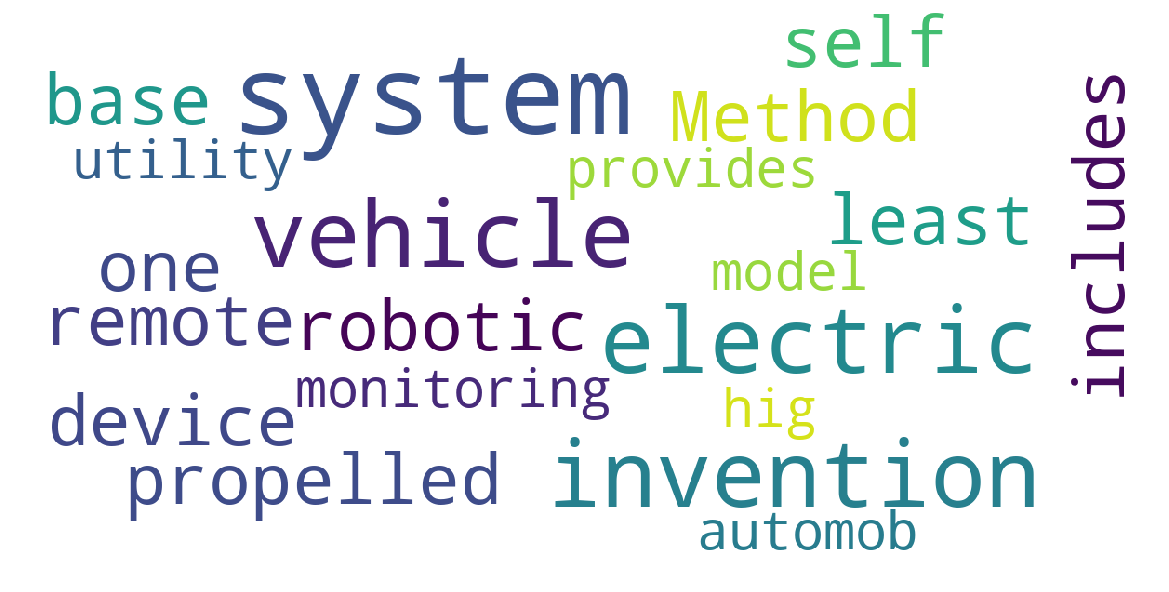

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 20 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df["Patent_title"].dropna())

**There are some words that have no meaning to our analysis such as include, provides,self etc. We need to clean our data for useless words**

## 3) Cleaning and Preprocessing
Add from standard file

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [12]:
print(doc_clean)

[['selfpropelled', 'electric', 'vehicle', 'includes', 'wheeled', 'frame', 'quick', 'connect', 'disconnect', 'hitch', 'drivingly', 'connecting', 'vehicle', 'variety', 'wheeled', 'device', 'individual', 'drive', 'pair', 'groundcontacting', 'wheel', 'includes', 'separate', 'reversible', 'motor', 'power', 'transmission', 'train', 'coupled', 'wheel', 'carry', 'inturned', 'extension', 'transmission', 'member', 'trained'], ['robotic', 'device', 'base', 'least', 'one', 'finger', 'least', 'two', 'link', 'connected', 'series', 'rotary', 'joint', 'least', 'two', 'degree', 'freedom', 'brushless', 'motor', 'associated', 'controller', 'located', 'joint', 'produce', 'rotational', 'movement', 'link', 'wire', 'electrical', 'power', 'communication', 'serially', 'connect', 'controller', 'distributed', 'control', 'network'], ['method', 'system', 'remote', 'monitoring', 'highrisk', 'patient', 'using', 'artificial', 'intelligence', 'plurality', 'highrisk', 'patient', 'simultaneously', 'monitored', 'without'

In [13]:
df2 = pd.DataFrame({'Patent_titles':doc_clean})
df2

,Patent_titles
0,"[selfpropelled, electric, vehicle, includes, w..."
1,"[robotic, device, base, least, one, finger, le..."
2,"[method, system, remote, monitoring, highrisk,..."
3,"[utility, model, provides, electric, automobil..."
4,"[automated, vehicle, charging, system, may, do..."
5,"[invention, overcomes, disadvantage, prior, ar..."
6,"[humanmachine, interface, detect, user, ear, p..."
7,"[invention, belongs, technical, field, automat..."
8,"[relational, artificial, intelligence, system,..."


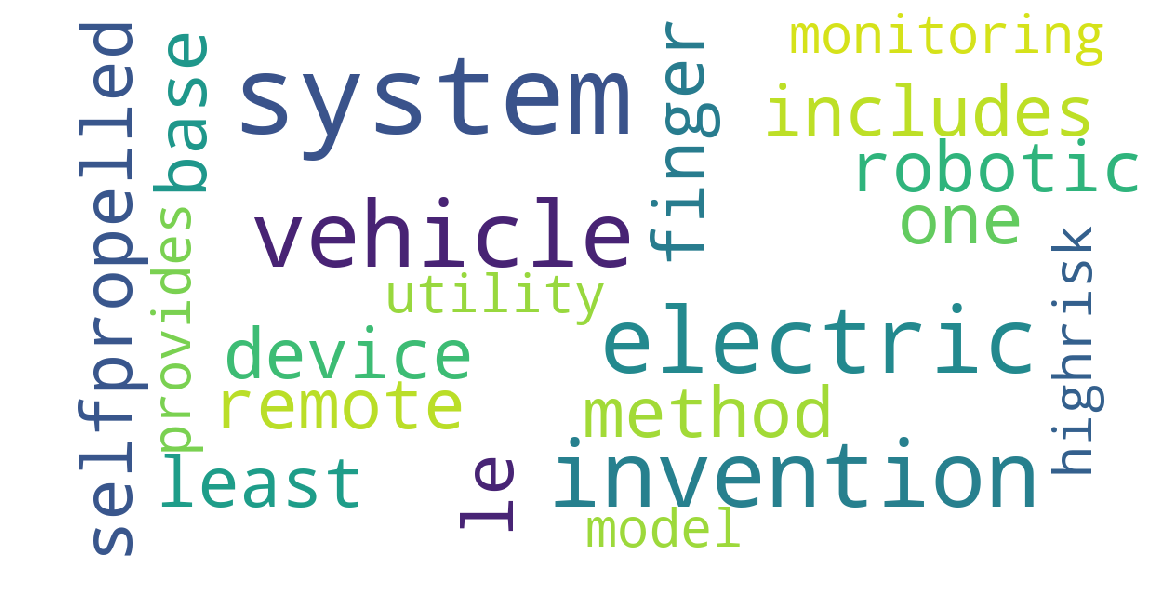

In [14]:
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 20 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df2["Patent_titles"].dropna())

#### Count word frequencies

In [15]:
from collections import defaultdict
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [16]:
# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in doc_clean]
print(processed_corpus)

[['electric', 'vehicle', 'includes', 'wheeled', 'frame', 'connect', 'vehicle', 'wheeled', 'device', 'wheel', 'includes', 'motor', 'power', 'transmission', 'wheel', 'transmission'], ['device', 'base', 'least', 'least', 'two', 'link', 'joint', 'least', 'two', 'motor', 'controller', 'joint', 'movement', 'link', 'power', 'communication', 'connect', 'controller', 'control'], ['system', 'remote', 'monitoring', 'highrisk', 'patient', 'using', 'artificial', 'intelligence', 'plurality', 'highrisk', 'patient', 'patient', 'patient', 'monitoring', 'patient', 'remote', 'monitoring', 'station'], ['provides', 'electric', 'automatic', 'robot', 'discharging', 'battery', 'station', 'communication', 'include', 'frame', 'set', 'frame', 'movement', 'elevating', 'system', 'set', 'frame', 'absorb', 'battery', 'set', 'elevating', 'system', 'absorb', 'battery'], ['vehicle', 'charging', 'system', 'station', 'charging', 'discharging', 'battery', 'electric', 'vehicle', 'include', 'information', 'charging', 'vehic

In [17]:
df3 = pd.DataFrame({'Patent_titles':processed_corpus})
df3

,Patent_titles
0,"[electric, vehicle, includes, wheeled, frame, ..."
1,"[device, base, least, least, two, link, joint,..."
2,"[system, remote, monitoring, highrisk, patient..."
3,"[provides, electric, automatic, robot, dischar..."
4,"[vehicle, charging, system, station, charging,..."
5,"[invention, humanmachine, interface, machine, ..."
6,"[humanmachine, interface, user, plurality, pro..."
7,"[invention, automatic, robot, device, comprise..."
8,"[relational, artificial, intelligence, system,..."


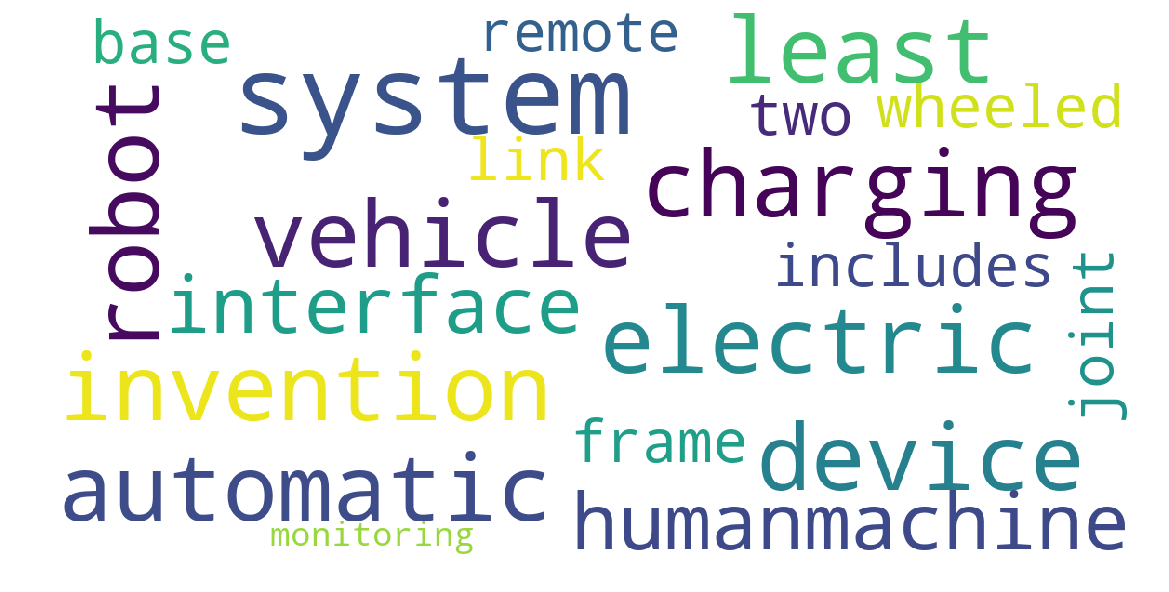

In [18]:
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 20 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df3["Patent_titles"].dropna())

**This looks much better now**

## 4) Preparing Document-Term Matrix

In [19]:
import gensim
from gensim import corpora

In [20]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 

dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## 5) Running LDA Model

In [21]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [22]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

## 6) Results

In [23]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.055*"system" + 0.055*"relational" + 0.046*"patient" + 0.037*"knowledge" + 0.028*"monitoring"'),
 (1,
  '0.027*"system" + 0.019*"interface" + 0.019*"mv" + 0.019*"machine" + 0.019*"vision"'),
 (2,
  '0.028*"controller" + 0.028*"least" + 0.019*"power" + 0.019*"device" + 0.019*"arm"'),
 (3,
  '0.043*"user" + 0.043*"procedure" + 0.016*"plurality" + 0.016*"humanmachine" + 0.016*"interacting"'),
 (4,
  '0.036*"battery" + 0.028*"frame" + 0.028*"vehicle" + 0.028*"set" + 0.028*"charging"')]